In [3]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq 
from scipy import stats

In [4]:
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv'

--2022-07-27 19:15:47--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 143.204.253.229, 143.204.253.200, 143.204.253.39, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|143.204.253.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53047 (52K) [text/plain]
Saving to: 'scaler_apollo_hospitals.csv.4'

scaler_apollo_hospi 100%[===================>]  51.80K  --.-KB/s    in 0.003s  

2022-07-27 19:15:47 (15.7 MB/s) - 'scaler_apollo_hospitals.csv.4' saved [53047/53047]



In [5]:
df=pd.read_csv('scaler_apollo_hospitals.csv')

In [10]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [ ]:
df.info()

In [6]:
df.isnull().sum()/len(df)*100

Unnamed: 0                 0.0
age                        0.0
sex                        0.0
smoker                     0.0
region                     0.0
viral load                 0.0
severity level             0.0
hospitalization charges    0.0
dtype: float64

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [9]:
df.select_dtypes('object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

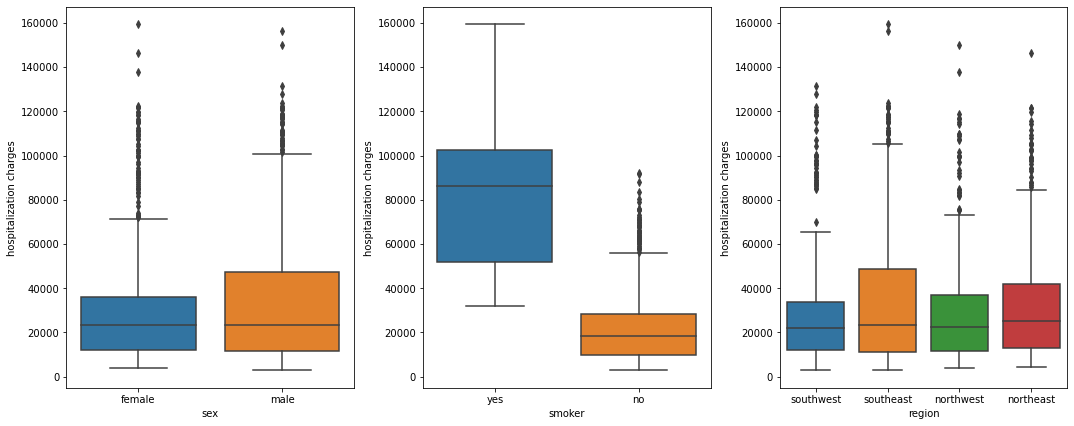

In [10]:
plt.figure(figsize=(15,6))
for i,j in enumerate(list(df.select_dtypes('object').columns)):
    plt.subplot(1,3,i+1)
    plt.subplots_adjust(hspace = 0.8)
    sbn.boxplot(x=j, y='hospitalization charges', data=df)
    plt.tight_layout(pad=1)

In [11]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [12]:
import numpy as np
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.0000,64.00
viral load,1338.0,10.221233,2.032796,5.32,8.7625,10.13,11.5675,17.71
severity level,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.0000,5.00
hospitalization charges,1338.0,33176.058296,30275.029296,2805.00,11851.0000,23455.00,41599.5000,159426.00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [14]:
df.select_dtypes(np.number).columns

Index(['age', 'viral load', 'severity level', 'hospitalization charges'], dtype='object')

In [15]:
#outlier treatment
for i,j in enumeraxte(list(df.select_dtypes(np.number).columns)):
    q1=df[j].quantile(0.25)
    q3=df[j].quantile(0.75)
    iqr=q3-q1

    df=df[(df[j]>=q1-1.5*iqr)&(df[j]<=q3+1.5*iqr)]

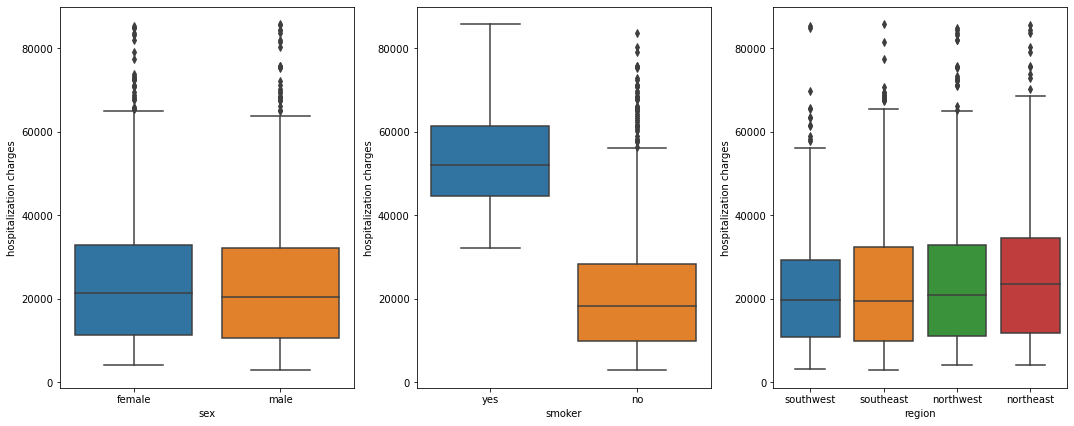

In [16]:
plt.figure(figsize=(15,6))
for i,j in enumerate(list(df.select_dtypes('object').columns)):
    plt.subplot(1,3,i+1)
    plt.subplots_adjust(hspace = 0.8)
    sbn.boxplot(x=j, y='hospitalization charges', data=df)
    plt.tight_layout(pad=1)

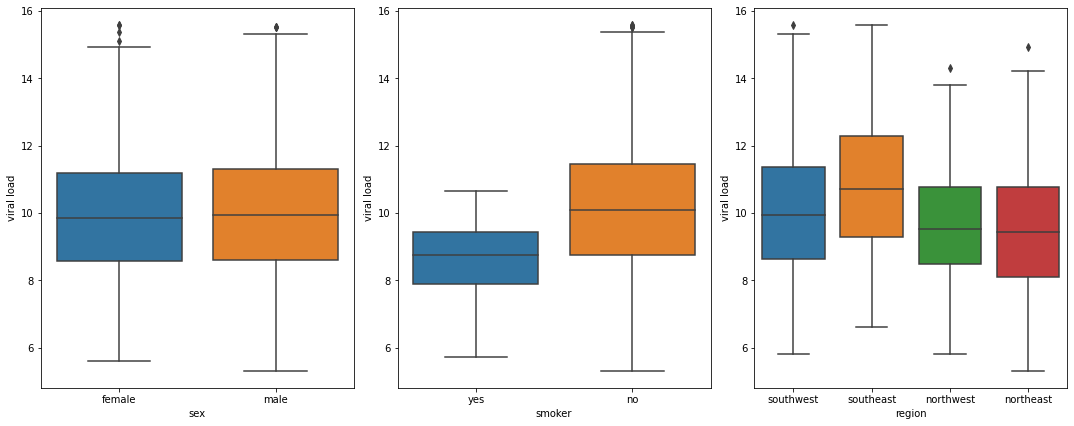

In [17]:
plt.figure(figsize=(15,6))
for i,j in enumerate(list(df.select_dtypes('object').columns)):
    plt.subplot(1,3,i+1)
    plt.subplots_adjust(hspace = 0.8)
    sbn.boxplot(x=j, y='xd', data=df)
    plt.tight_layout(pad=1)

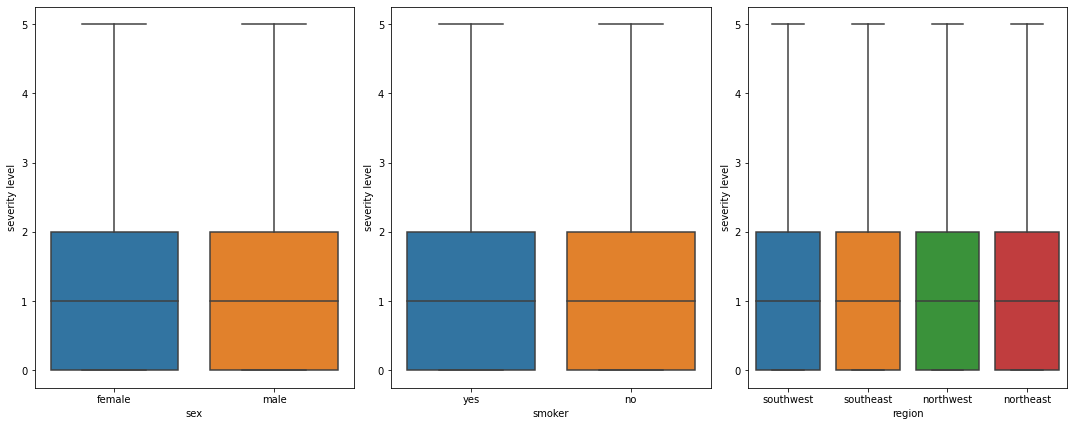

In [18]:
plt.figure(figsize=(15,6))
for i,j in enumerate(list(df.select_dtypes('object').columns)):
    plt.subplot(1,3,i+1)
    plt.subplots_adjust(hspace = 0.8)
    sbn.boxplot(x=j, y='severity level', data=df)
    plt.tight_layout(pad=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1191 non-null   int64  
 1   sex                      1191 non-null   object 
 2   smoker                   1191 non-null   object 
 3   region                   1191 non-null   object 
 4   viral load               1191 non-null   float64
 5   severity level           1191 non-null   int64  
 6   hospitalization charges  1191 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 106.7+ KB


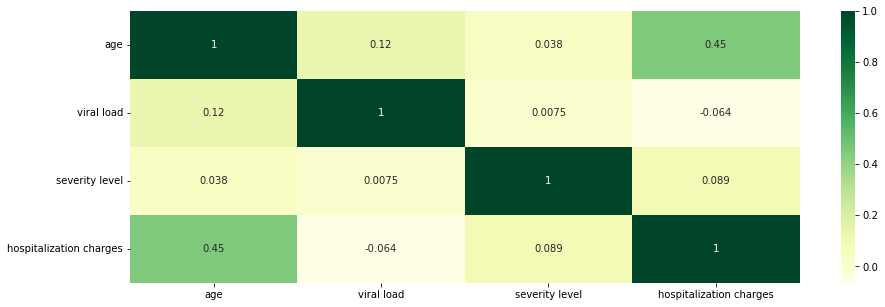

In [20]:
plt.figure(figsize=(15,5))
sbn.heatmap(df.corr(),annot=True ,cmap="YlGn" )
plt.show()

# Deep Dive into Age 

In [21]:
# as age has the highest correlation with the charges, therefore, let's check charges by age bin
df['age bins']=pd.cut(x=df['age'], bins=[0,18,28,38,48,58,68,100],labels=['0-18','18-28','28-38','38-48','48-58','58-68','68-100'])

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

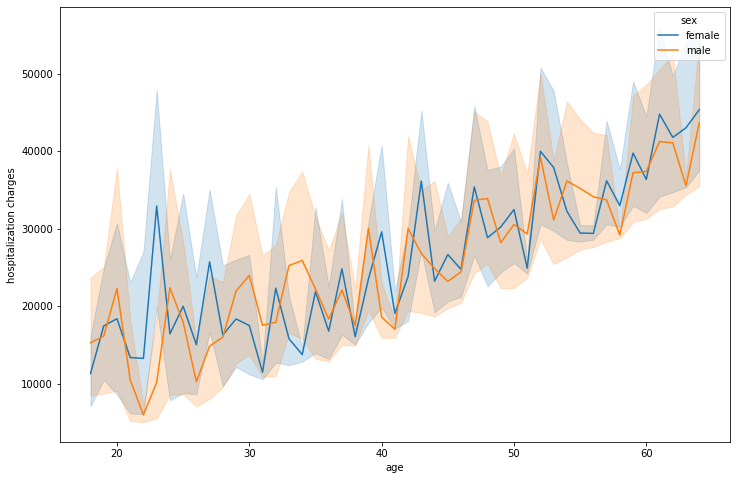

In [22]:
plt.figure(figsize=(12,8))
sbn.lineplot(x='age', y='hospitalization charges', data=df, hue='sex')

<AxesSubplot:xlabel='age bins', ylabel='hospitalization charges'>

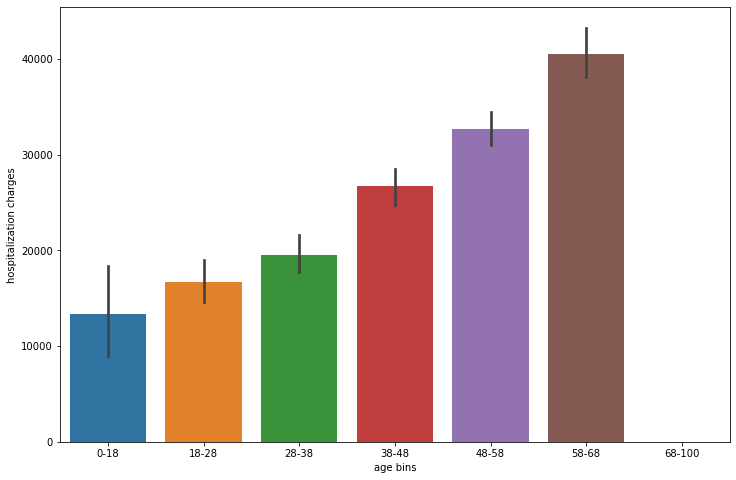

In [23]:
plt.figure(figsize=(12,8))
sbn.barplot(x='age bins', y='hospitalization charges', data=df)

In [24]:
df.groupby(['region','sex','smoker']).mean()['hospitalization charges'].unstack()

smoker                      no           yes
region    sex                               
northeast female  24105.053435  48756.263158
          male    21660.096000  56480.500000
northwest female  21967.518519  58942.350000
          male    20801.734848  56219.444444
southeast female  20590.739130  56240.470588
          male    19123.868217  53855.058824
southwest female  19585.122302  54129.909091
          male    19447.293651  50628.571429

# Some Conclusions based on EDA
- As expected , as the age of the beneficiary  increases ,the cost to insurance increases.
- Males who smoke have most claims and have higher bills.
- Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.


## 1. Prove (or disprove) that the hospitalisation of people who do smoking is greater than those who don't? (t-test Right tailed)

In [25]:
df.groupby('smoker')['hospitalization charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1055.0,20907.971564,14563.067125,2805.0,9962.5,18313.0,28387.5,83680.0
yes,136.0,54578.154412,13360.849267,32074.0,44663.5,51899.5,61421.5,85758.0


<b>Step 1: Define null and alternative hypothesis</b></font><br>
<br>
$\ H_0  :  \mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers 
 <br>
 

$\ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>
<br>

<b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05



    


#### Step3: 

<b>Standard deviation of the population is not known  ,will perform a T stat test .  The > sign in alternate hypothesis indicate  test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of  sampling  distribution curve. </b>

In [26]:
smoker=df[df['smoker']=='yes']['hospitalization charges'].sample(109)
non_smoker=df[df['smoker']=='no']['hospitalization charges'].sample(109)

In [27]:
alpha=0.05
t_statistic, p_value = stats.ttest_ind(smoker, non_smoker,equal_var=False)
#equal_var=False --> welch test--> doesn't assume variance to be equal
p_value_onetail=p_value/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic,p_value, p_value_onetail ))


Test statistic = 19.10483863138369 , Pvalue =2.768869225260506e-48 , OnetailPvalue = 1.384434612630253e-48


In [28]:
if p_value<alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.384434612630253e-48 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


In [29]:
#Alternative hypothesis is true

# or

In [30]:
alpha=0.05
t_statistic, p_value = stats.ttest_ind(smoker, non_smoker, alternative='greater', equal_var=False)

print("Here Pvalue is automatically of ONE TAIL P VALUE ={} as you have specified that the alternative = greater which means one tail test ".format(p_value ))


Here Pvalue is automatically of ONE TAIL P VALUE =1.384434612630253e-48 as you have specified that the alternative = greater which means one tail test 


# 2. Prove (or disprove) with statistical evidence that the viral load of females is different from that of males

In [31]:
df.groupby('sex')['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,610.0,9.966541,1.96940,5.60,8.585,9.855,11.1725,15.58
male,581.0,10.030947,1.94495,5.32,8.600,9.940,11.2900,15.51


In [33]:
male=df[df['sex']=='male']['viral load'].sample(581)
female=df[df['sex']=='female']['viral load'].sample(581)

<b>Step 1: Define null and alternative hypothesis</b></font><br>
<br>
$\ H_0  :  \mu_1 = \mu_2  $ No difference in the viral load of females and males
 <br>
 

$\ H_a  :\mu_1 != \mu_2 $  Difference in the viral load of females and males <br>
</div>
<br>

<b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05



    


#### Step3: 

Standard deviation of the population is not known ,will perform a T stat test. Not equal to sign in alternate hypothesis indicate its a two tailed test.

In [34]:
alpha=0.05
t_statistic, p_value = stats.ttest_ind(male, female, alternative='two-sided')

print("Test statistic = {} , Pvalue ={} ".format(t_statistic,p_value ))


Test statistic = 0.5501358940572972 , Pvalue =0.5823320795804493 


/Users/suraaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/suraaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viral load', ylabel='Density'>

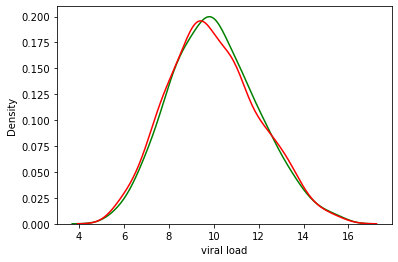

In [35]:
sbn.distplot(male,color='green',hist=False)
sbn.distplot(female,color='red',hist=False)

 #### We fail to reject the null hypothesis and can conclude that There is no difference between viral load of Female and viral load of Males. 

# 3. Is the proportion of smoking significantly different across different regions? (chi-square)


$H_0  : $Smokers proportions is not significantly different across different regions <br>
<br>$ H_1  : $Smokers proportions is  different across different regions  <br>
</div>

#### Here we are comparing two different categorical variables, smoker and  different region. So perform a  Chi-sq Test.


In [36]:
contigency= pd.crosstab(df.region, df.smoker)
contigency

smoker,no,yes
region,,
northeast,256,39
northwest,267,38
southeast,267,34
southwest,265,25


In [37]:
df.groupby(['region','smoker'])['age'].count().unstack()

smoker,no,yes
region,,
northeast,256,39
northwest,267,38
southeast,267,34
southwest,265,25


<AxesSubplot:xlabel='region'>

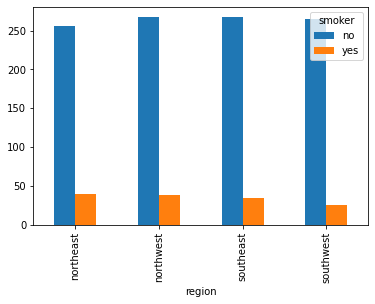

In [38]:
contigency.plot(kind='bar')

In [39]:
# Using the chi2_contingency test 
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 3.5220357595425758 , Pvalue: 0.31791538258247426 , Degree of freedom: 3 ,expected frequencies: [[261.31402183  33.68597817]
 [270.17212427  34.82787573]
 [266.62888329  34.37111671]
 [256.88497061  33.11502939]] 


In [40]:
if (pval < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis


# 4. Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence. 


$H_0: $μ1 = μ2 = μ3  The mean viral load of women with no severity level , one severity level,two severity level is same <br>

$H_a:$  Atleast  one of mean viral load of women is not same <br>
</div>

#### One-way ANOVA - Equality of population through variances of samples.

In [41]:
df[df['sex']=='female'].groupby('severity level')['viral load'].describe().head(3)

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,268.0,9.963209,1.936862,5.76,8.6075,9.695,11.1300,14.92
1,147.0,9.908844,1.918987,5.60,8.6000,9.670,11.1300,15.36
2,106.0,9.945000,2.092305,5.73,8.3450,10.060,11.2025,15.57


In [42]:
df_female_severe=df[df['sex']=='female'].loc[df[df['sex']=='female']['severity level']<=2]

In [43]:
df_female_severe.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age bins
0,19,female,yes,southwest,9.30,0,42212,18-28
5,31,female,no,southeast,8.58,0,9392,28-38
6,46,female,no,southeast,11.15,1,20601,38-48
9,60,female,no,northwest,8.61,0,72308,58-68
11,62,female,yes,southeast,8.76,0,69522,58-68


In [44]:
df_female_severe['severity level'].value_counts()

0    268
1    147
2    106
Name: severity level, dtype: int64

<AxesSubplot:xlabel='severity level', ylabel='viral load'>

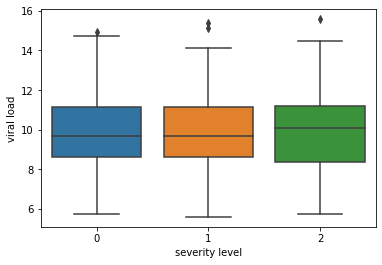

In [45]:
sbn.boxplot(x='severity level', y='viral load', data=df_female_severe)

#### Normality Assumption Check

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ viral load follows normal distribution

against the alternative hypothesis

>$H_a:$ viral load doesn't follow normal distribution


In [46]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df_female_severe['viral load']) 
print('The p-value is', p_value)

The p-value is 0.006814346183091402


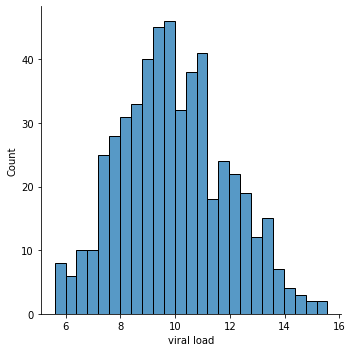

In [47]:
sbn.displot(df_female_severe['viral load'],bins=25) #this looks normal. since the data is not continuous

In [49]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(np.log(df_female_severe['viral load']) )
print('The p-value is', p_value)

The p-value is 0.009911485947668552


Please continue doing the analysis even If some assumption fail (levene’s test) but double check using visual analysis and report wherever necessary

Anova is not very sensitive to moderate deviations from normality; simulation studies, using a variety of non-normal distributions, have shown that the false positive rate is not affected very much by this violation of the assumption (Glass et al. 1972, Harwell et al. 1992, Lix et al. 1996). This is because when you take a large number of random samples from a population, the means of those samples are approximately normally distributed even when the population is not normal.

##### Homogeneity of variance Assumption Check

### Levene’s test

We will test the null hypothesis

>$H_0$: All the viral load variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [53]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_female_severe[df_female_severe['severity level']==0]['viral load'].sample(106), 
                             df_female_severe[df_female_severe['severity level']==1]['viral load'].sample(106), 
                             df_female_severe[df_female_severe['severity level']==2]['viral load'].sample(106))
# find the p-value
print('The p-value is', p_value)

The p-value is 0.8835210445559333


In [54]:
p_value>0.05


True

### Anova

In [55]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(df_female_severe[df_female_severe['severity level']==0]['viral load'].sample(106), 
                             df_female_severe[df_female_severe['severity level']==1]['viral load'].sample(106), 
                             df_female_severe[df_female_severe['severity level']==2]['viral load'].sample(106))
# print the p-value
print('The p-value is', p_value)

The p-value is 0.552014453161594


In [56]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.552014453161594 is greater than the level of significance, we fail to reject the null hypothesis.


## Recommendation Examples

Based on EDA and statistical evidence it can be seen that customer who smoke or have higher viral load have more higher hospitalization charges.
<br>
<br>
We can encourage customers to quit smoking by providing them incentive points for talking to life coach, get help for improving lifestyle habits, Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
<br>
<br>
High viral load is primarily because of less immunity in the body. We can provide patients with high vitamins rich diet plans and wellness health coaches which can help them to make right choices.
